In [1]:
##Solution for question 1

from random import random as rand
from matplotlib import pyplot as plt
import matplotlib as mpl
from math import log
import seaborn as sns
import numpy as np

# function to calculate exponential random variables
#using the definitions from the lecture slides

def expn(lamda):
    un=rand()
    ex=-(1/lamda)*log(1-un)
    return ex

# function to generate gamma distribution random variables 
#by summing up exponential random variables,
# definitions from the lecture slide

def gamma(n,scale,number=1):
    if number == 1:
        return sum([expn(scale) for _ in range(n)])
    return [sum([expn(scale) 
                 for _ in range(n)])
                for _ in range(number)]
#using the method definition of 'list comprehensions'

#defining own functions of mean,variance and mode
def mean(distr):
    return sum(distr)/len(distr)

def variance(distr):
    distr = np.array(distr)
    return mean(distr**2) - mean(distr)**2

def mode(distr):
    return max(set(distr), key=distr.count)

# calculating for numbers 100,1000,10000
gamma_100   = gamma(3,2,100)
gamma_1000  = gamma(3,2,1000)
gamma_10000 = gamma(3,2,10000)


print("\tN=100|\t N=1000|  N=10000 \nMean: {:7.4f} \t {:6.4f}\t{:8.4f}\nVar : {:7.4f}\t{:6.4f}\t{:8.4f}\nMode: {:7.4f}\t{:6.4f}\t{:8.4f}".format(
    mean(gamma_100),mean(gamma_1000),mean(gamma_10000),
    variance(gamma_100),variance(gamma_1000),variance(gamma_1000),
    mode(gamma_100),mode(gamma_1000),mode(gamma_10000)))

#relation of variance to N
var_dist=[]
N = range(2,10001)
for n in N:
    var_dist.append(variance(gamma(3,2,n)))

    
ax = plt.plot(N,var_dist)
plt.xlabel("N")
plt.ylabel("Variance(Gamma(3,2,N))")
plt.show()


	N=100|	 N=1000|  N=10000 
Mean:  1.4889 	 1.4496	  1.4958
Var :  0.8215	0.6651	  0.6651
Mode:  0.9715	0.9800	  0.7480


<Figure size 640x480 with 1 Axes>

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,0,'Mean of 100 samples of Gamma(3,2)')]

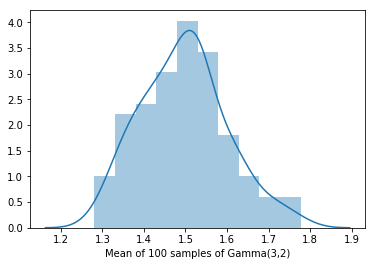

In [2]:
#Applying the principles of Central Limit Theorem,
#as n approaches infinity we will get a normal distribution,
# which is what we exactly see, if we increase it to 10000,
#the bell curve is more prominant
meansofdistr =[]
N = 100
for _ in range(N):
    meansofdistr.append(mean(gamma(3,2,N)))
    
ax=sns.distplot(meansofdistr)
ax.set(xlabel="Mean of 100 samples of Gamma(3,2)")
#end of q1

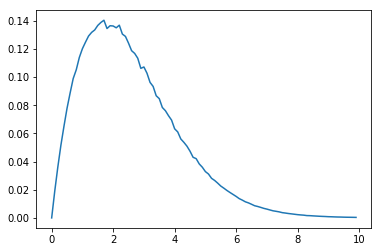

In [4]:
# Exercise 2: Lets first define a function to generate Y~N(0,4)
# Through Normal Distribution

#redefining Expn function to accomadate paramter n

def gen_exp(x,l):
    return l*np.exp(-l*x)

# Defining the normal distribution density function 
def gen_normal(x,mu,sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*
                    np.exp(-1/(2*sigma**2)*(x-mu)**2)

# trying to stimulate the PDF
# Creating a range for the x-axis distribution of Z 
#i.e from 0 to 10 at an interval of 0.1
Z = np.arange(0,10,.1)
# How many random samples to take for Monte-Carlo Integration
N = 1000
# The probability density function for z that will be calculated
p_z = []

# Parameters for X~Exp(1) and Y~N(0,4)
mu =0
sigma = 2
l =1

# For each point on the x-axis we shall evaluate the integral
for z in Z:
    # A temporary array to hold all the function values at a point z
    arry = []
    # N runs to get samples of the integral
    for _ in range(N):
        # Generating uniform random variables in [0,z] 
        #as the integral is from [0,z] limits
        x_i = np.random.uniform(low=0,high=z)
        e = gen_exp(x_i,l)
        n = gen_normal(z-x_i,mu,sigma)
        # calulating the convolution 
        arry.append(n*e)
    # Calculating the value of the integral
    #at that point and muliplying by the volume
    p_z.append(mean(arry)*z)

#Plotting the graph

plt.plot(Z,(p_z))
plt.show()